In [12]:
%matplotlib widget

In [6]:
import pandas as pd

def _infer_bout_start(df, bout, st):
    """Infer a bout's start time from the previous bout's end time.

    Parameters
    ----------
    h: DataFrame, (n_bouts, ?)
        Hypogram in Visbrain format with 'start_time'.
    row: Series
        A row from `h`, representing the bout that you want the start time of.

    Returns
    -------
    start_time: float
        The start time of the bout from `row`.
    """
    if bout.name == 0:
        start_time = st
    else:
        start_time = df.loc[bout.name - 1].end_time

    return start_time

def load_hypno_file(path, st=28800):
    """Load a Visbrain formatted hypnogram."""
    df = pd.read_csv(path, sep="\t", names=["state", "end_time"], comment="*")
    df['end_time'] = df['end_time']+st
    df["start_time"] = df.apply(lambda row: _infer_bout_start(df, row, st), axis=1)
    df["duration"] = df.apply(lambda row: row.end_time - row.start_time, axis=1)
    return df

In [7]:
path = "/Volumes/opto_loc/Data/ACR_PROJECT_MATERIALS/ACR_12/hypnograms/hypno_control1-bl_chunk5.txt"
h = load_hypno_file(path)

In [10]:
from kdephys.main.plots import hypno_colors
import matplotlib.pyplot as plt

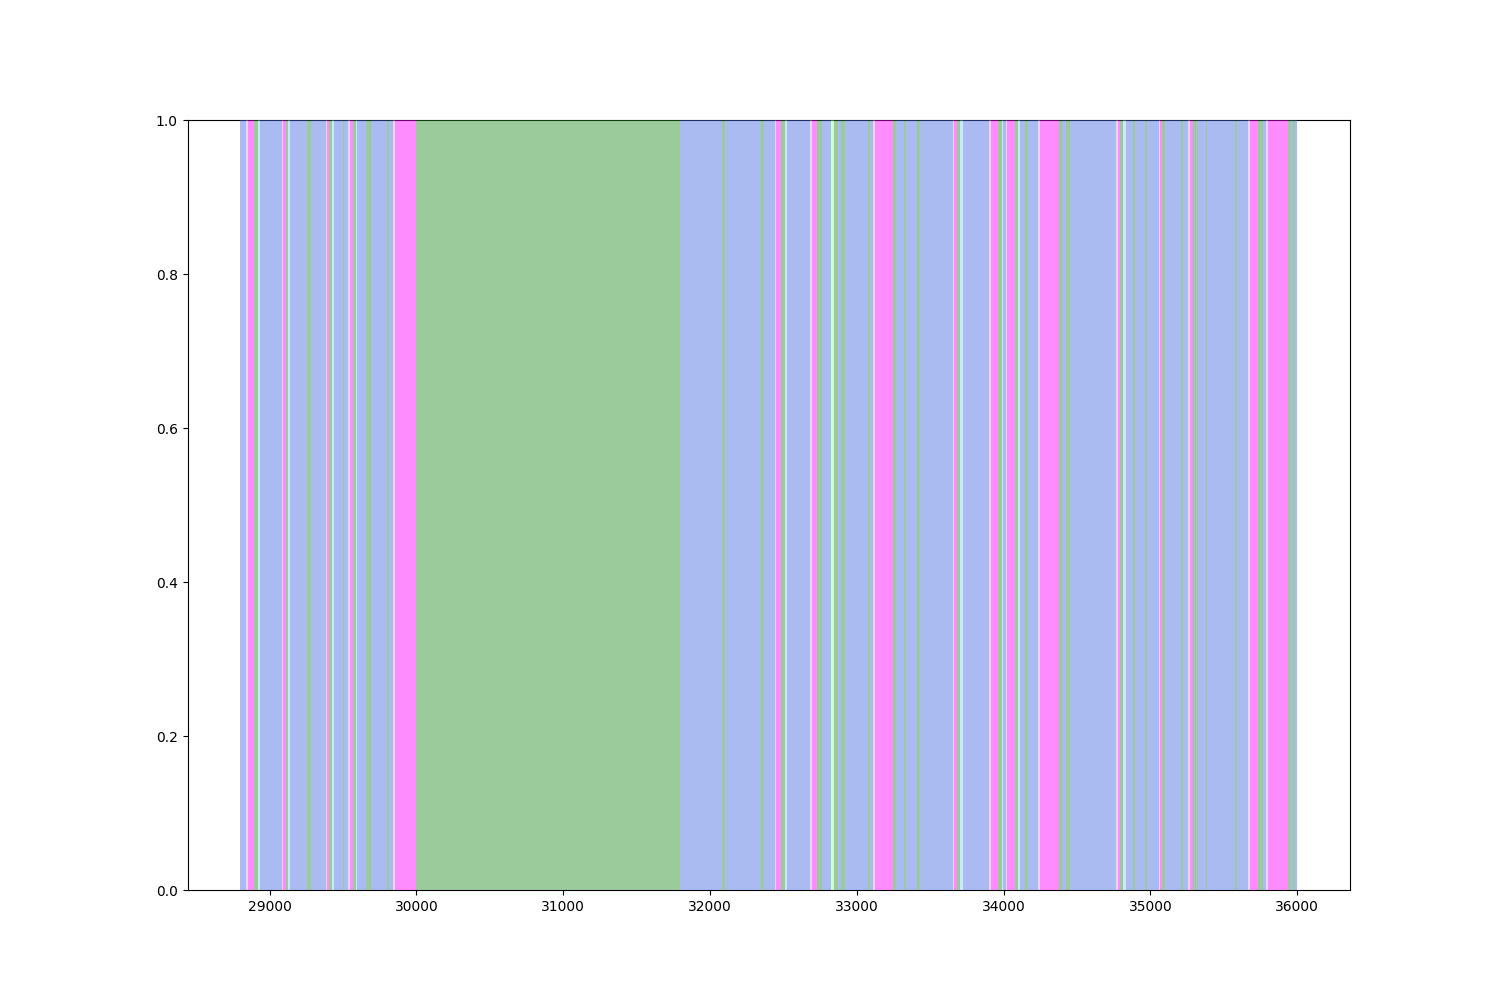

In [15]:
f, ax = plt.subplots(figsize=(15, 10))
for bout in h.itertuples():
        ax.axvspan(
            bout.start_time,
            bout.end_time,
            alpha=0.45,
            color=hypno_colors[bout.state],
            zorder=1000,
            ec="none",
        )

In [ ]:

def shade_hypno_for_me(
    hypnogram, ax=None, xlim=None
):
    """Shade plot background using hypnogram state.

    Parameters
    ----------
    hypnogram: pandas.DataFrame
        Hypnogram with with state, start_time, end_time columns.
    ax: matplotlib.Axes, optional
        An axes upon which to plot.
    """
    xlim = ax.get_xlim() if (ax and not xlim) else xlim

    ax = dspu.check_ax(ax)
    for bout in hypnogram.itertuples():
        ax.axvspan(
            bout.start_time,
            bout.end_time,
            alpha=0.45,
            color=hypno_colors[bout.state],
            zorder=1000,
            ec="none",
        )

    ax.set_xlim(xlim)
    return ax